In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/HateOffensive/train.csv')
df

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [5]:
df[df['class'] == 0]

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...,...,...,...,...
24576,3,2,1,0,0,this guy is the biggest faggot omfg
24685,3,2,1,0,0,which one of these names is more offensive kik...
24751,3,2,1,0,0,you a pussy ass nigga and I know it nigga.
24776,3,3,0,0,0,you're all niggers


In [6]:
def clean_text(text):
    # removing url, punctuation, lowercasing, removing html, removing numbers, removing extra spaces
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    return text

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# defining stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = word_tokenize(text)
    # removing stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

In [9]:
# lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [10]:
# text cleaning and removing stopwords
df['tweet'] = df['tweet'].apply(clean_text)
df['tweet'] = df['tweet'].apply(remove_stopwords)
df['tweet'] = df['tweet'].apply(lemmatize_text)

In [11]:
df.dtypes

count                        int64
hate_speech_count            int64
offensive_language_count     int64
neither_count                int64
class                        int64
tweet                       object
dtype: object

In [12]:
# changing data type to object
df['class'] = df['class'].astype(str)
df.dtypes

count                        int64
hate_speech_count            int64
offensive_language_count     int64
neither_count                int64
class                       object
tweet                       object
dtype: object

In [13]:
df['class'] = df['class'].replace({'0': 'hate', '1': 'offensive', '2': 'neither'})

category = pd.get_dummies(df['class'])
classify = pd.concat([df, category], axis=1)
classify = classify.drop(columns='class')
classify

,count,hate_speech_count,offensive_language_count,neither_count,tweet,hate,neither,offensive
0,3,0,0,3,rt woman shouldnt complain cleaning house amp ...,0,1,0
1,3,0,3,0,rt boy dat coldtyga dwn bad cuffin dat hoe st ...,0,0,1
2,3,0,3,0,rt dawg rt ever fuck bitch start cry confused ...,0,0,1
3,3,0,2,1,rt look like tranny,0,0,1
4,6,0,6,0,rt shit hear might true might faker bitch told ya,0,0,1
...,...,...,...,...,...,...,...,...
24778,3,0,2,1,yous muthafin lie right tl trash mine bible sc...,0,0,1
24779,3,0,1,2,youve gone broke wrong heart baby drove rednec...,0,1,0
24780,3,0,3,0,young buck wan na eat dat nigguh like aint fuc...,0,0,1
24781,6,0,6,0,youu got wild bitch tellin lie,0,0,1


In [14]:
x = classify['tweet']
y = classify[['hate', 'offensive', 'neither']].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)

In [15]:
tokenizer = Tokenizer(num_words = 2000, oov_token = 'x')

tokenizer.fit_on_texts(kalimat_latih)

sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2001, 16),

    tf.keras.layers.LSTM(24),

    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.SGD(learning_rate=0.0037) , metrics=['accuracy'])

In [17]:
checkpoint = ModelCheckpoint('hate_speech.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose= 5)
early_stopping= EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

In [18]:
history = model.fit(padded_latih,
                    y_latih,
                    batch_size = 25,
                    epochs= 300,
                    callbacks = [checkpoint, early_stopping],
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/300

Epoch 1: val_accuracy improved from -inf to 0.77345, saving model to hate_speech.h5
794/794 - 10s - loss: 1.0326 - accuracy: 0.7729 - val_loss: 0.9163 - val_accuracy: 0.7735 - 10s/epoch - 12ms/step
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.77345
794/794 - 7s - loss: 0.9190 - accuracy: 0.7745 - val_loss: 0.8791 - val_accuracy: 0.7735 - 7s/epoch - 9ms/step
Epoch 3/300

Epoch 3: val_accuracy did not improve from 0.77345
794/794 - 6s - loss: 0.8813 - accuracy: 0.7745 - val_loss: 0.8516 - val_accuracy: 0.7735 - 6s/epoch - 8ms/step
Epoch 4/300

Epoch 4: val_accuracy did not improve from 0.77345
794/794 - 8s - loss: 0.8518 - accuracy: 0.7745 - val_loss: 0.8285 - val_accuracy: 0.7735 - 8s/epoch - 10ms/step
Epoch 5/300

Epoch 5: val_accuracy did not improve from 0.77345
794/794 - 7s - loss: 0.8299 - accuracy: 0.7745 - val_loss: 0.8086 - val_accuracy: 0.7735 - 7s/epoch - 8ms/step
Epoch 6/300

Epoch 6: val_accuracy did not improve from 0.77345
794/794 - 8s - loss: 0.8117 - accuracy: 0.7745 - val_loss: 0.7908 - val_accuracy: 0.7735 - 8s/epoch - 10ms/step
Epoch 7/300

Epoch 7: val_accuracy did not improve from 0.77345
794/794 - 7s - loss: 0.7925 - accuracy: 0.7745 - val_loss: 0.7749 - val

Text(0.5, 1.0, 'loss')

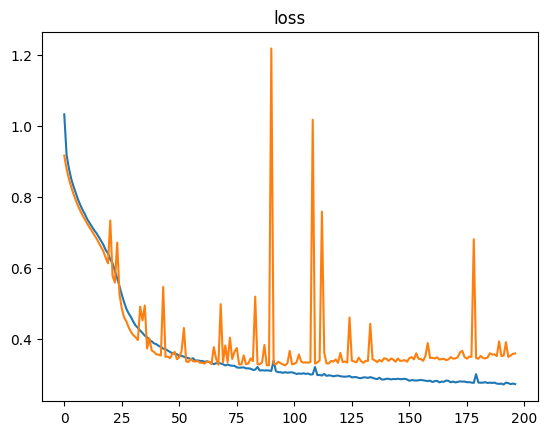

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')

Text(0.5, 1.0, 'accuracy')

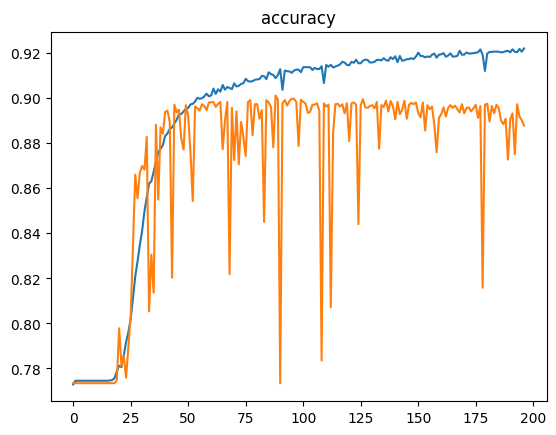

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')

In [21]:
model = tf.keras.models.load_model('hate_speech.h5')
loss, accuracy = model.evaluate(padded_test, y_test)

155/155 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.9011
